![Descrição da imagem](https://logodownload.org/wp-content/uploads/2016/11/formula-1-logo-5-2.png)

### Introduction

The Formula 1, commonly abbreviated as F1, is the most prestigious and popular category of motorsport racing in the world. It is one of the most-watched and exciting motorsports globally, attracting fans of all ages. It is characterized by high speeds, spectacular overtaking maneuvers, complex race strategies, and the ongoing pursuit of technical and sporting excellence.

The dataset for analysis was obtained on Kaggle through the following link: https://www.kaggle.com/datasets/dubradave/formula-1-drivers-dataset

I will answer the following questions using the dataset:

- 1. Top 10 nationalities most represented in Formula 1.
- 2. Top 10 drivers with the highest conversion of wins (pole position success rate).
- 3. Top 5 nationalities with the highest points (table + chart).
- 4. Distribution of drivers between pole positions and race wins.
- 5. Simple regression analysis of data on the correlation between pole position and wins.
- 6. Plotting a regression graph to visually analyze the slope of the line.

### Import of the necessary Python libraries and first impressions

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [70]:
df = pd.read_csv("F1DriversDataset.csv")
df.head(5)

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [11]:
print(df.dtypes)

Driver                 object
Nationality            object
Seasons                object
Championships         float64
Race_Entries          float64
Race_Starts           float64
Pole_Positions        float64
Race_Wins             float64
Podiums               float64
Fastest_Laps          float64
Points                float64
Active                   bool
Championship Years     object
Decade                  int64
Pole_Rate             float64
Start_Rate            float64
Win_Rate              float64
Podium_Rate           float64
FastLap_Rate          float64
Points_Per_Entry      float64
Years_Active            int64
Champion                 bool
dtype: object


### 1. Top 10 nationalities most represented in Formula 1.

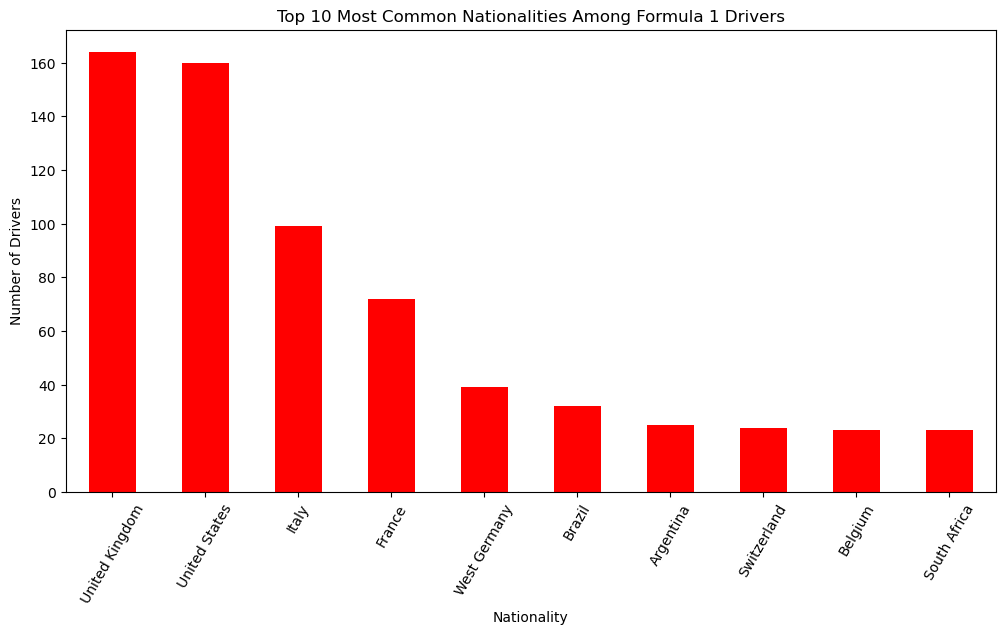

In [98]:
nationalities_count = df["Nationality"].value_counts()

plt.figure(figsize=(12, 6))
nationalities_count.head(10).plot(kind="bar", color="red")
plt.title("Top 10 Most Common Nationalities Among Formula 1 Drivers")
plt.xlabel("Nationality")
plt.ylabel("Number of Drivers")
plt.xticks(rotation=60)
plt.show()

The United Kingdom is one of the most prominent countries in Formula 1 for several reasons:

Passion for Racing: The British have a genuine passion for car racing. This is reflected in the history of exciting car races dating back decades.

Talented Engineers: The United Kingdom is known to have some of the world's most talented automotive engineers. This is crucial for Formula 1's success, where technology plays a pivotal role.

Prestigious Teams: Some of the most respected Formula 1 teams are based in the United Kingdom. This provides incredible opportunities for British drivers to start their careers in F1.

Path to Success: The United Kingdom offers a clear path for talented drivers. There are feeder series like Formula 2 and Formula 3 that help drivers progress towards F1.

Motorsport Culture: The British love car racing. There is a strong motorsport culture with many passionate fans supporting the sport.

Local Heroes: Famous British drivers like Lewis Hamilton and Jackie Stewart inspire young talents to pursue their dreams in Formula 1.

Due to all these reasons, the United Kingdom remains a place where Formula 1 thrives, and many talented drivers have the chance to shine on the international stage.

### 2. Top 10 drivers with the highest conversion of wins (pole position success rate).

In [82]:
top_10_conversion = df.nlargest(10, 'Pole_Positions')
top_10_conversion['Wins'] = df.loc[df['Driver'].isin(top_10_conversion['Driver']), 'Race_Wins'].values
top_10_conversion['Win_Conversion_Rate'] = top_10_conversion['Wins'] / top_10_conversion['Pole_Positions']

columns = ['Driver', 'Nationality', 'Pole_Positions', 'Wins', 'Win_Conversion_Rate']

table = tabulate(top_10_conversion[columns], headers='keys', tablefmt='fancy_grid')
print("Top 10 drivers with the highest conversion of wins (pole position success rate).")
print(table)

Top 10 drivers with the highest conversion of wins (pole position success rate).
╒═════╤════════════════════╤════════════════╤══════════════════╤════════╤═══════════════════════╕
│     │ Driver             │ Nationality    │   Pole_Positions │   Wins │   Win_Conversion_Rate │
╞═════╪════════════════════╪════════════════╪══════════════════╪════════╪═══════════════════════╡
│ 338 │ Lewis Hamilton     │ United Kingdom │              103 │     25 │              0.242718 │
├─────┼────────────────────┼────────────────┼──────────────────┼────────┼───────────────────────┤
│ 710 │ Michael Schumacher │ Germany        │               68 │     24 │              0.352941 │
├─────┼────────────────────┼────────────────┼──────────────────┼────────┼───────────────────────┤
│ 720 │ Ayrton Senna       │ Brazil         │               65 │     20 │              0.307692 │
├─────┼────────────────────┼────────────────┼──────────────────┼────────┼───────────────────────┤
│ 812 │ Sebastian Vettel   │ Germany 

Here we have an interesting fact. Ayrton Senna, a Brazilian driver who is currently deceased (he died in an accident during a race on May 1, 1994, at the San Marino Grand Prix in Imola, Italy), holds a place in the top 3. He continues to amaze in his position on the "Top 10 drivers with the highest conversion of wins (pole position success rate)" table. With his third place and a record of 24 wins and 68 poles, he is only surpassed by Michael Schumacher (24 wins and 68 poles) and Lewis Hamilton (25 wins and 103 poles). Just imagine if he had raced for more years?

### 3. Top 5 nationalities with the highest points (table + chart).

In [81]:
nationality_points = df.groupby('Nationality')['Points'].sum().reset_index()

top_nationalities = nationality_points.sort_values(by='Points', ascending=False).head(5)

table = tabulate(top_nationalities, headers='keys', tablefmt='fancy_grid')

print('Top 5 Nationalities with the Highest Total Points in Formula 1:')
print(table)

Top 5 Nationalities with the Highest Total Points in Formula 1:
╒════╤════════════════╤══════════╕
│    │ Nationality    │   Points │
╞════╪════════════════╪══════════╡
│ 42 │ United Kingdom │ 10553.8  │
├────┼────────────────┼──────────┤
│ 16 │ Germany        │  7734.5  │
├────┼────────────────┼──────────┤
│ 14 │ Finland        │  4391.5  │
├────┼────────────────┼──────────┤
│ 15 │ France         │  3436.47 │
├────┼────────────────┼──────────┤
│  5 │ Brazil         │  3415    │
╘════╧════════════════╧══════════╛


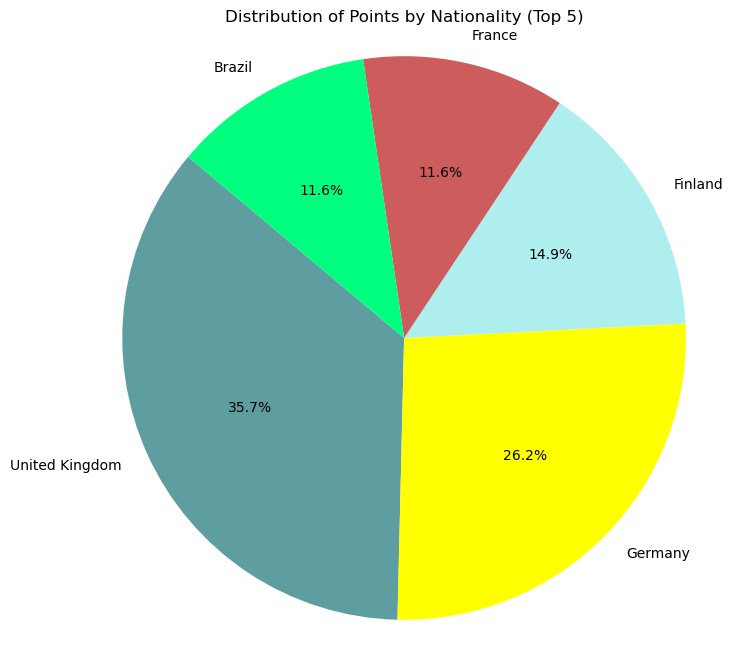

In [99]:
nationalities = top_nationalities['Nationality']
points = top_nationalities['Points']

sizes = points
labels = nationalities

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['cadetblue', 'yellow', 'paleturquoise', 'indianred', 'springgreen'])
plt.axis('equal')  # Ensures the chart is a perfect circle.

plt.title('Distribution of Points by Nationality (Top 5)')

plt.show()

The fact that certain nationalities are in the top 5 with the highest total points in Formula 1 is not necessarily due to cultural reasons. Instead, it is typically a combination of factors, including:

Racing Tradition: Countries with a long tradition in car racing tend to have more drivers involved in Formula 1. For example, the United Kingdom has a strong tradition in car racing, with several F1 teams based there.

Automotive Infrastructure: Countries with infrastructure to develop automotive talents, such as race tracks, racing schools, support teams, and driver academies, have an advantage in producing successful drivers.

Financial Support: Formula 1 is an expensive sport, and drivers often need sponsorship or financial support to make it. Countries with passionate fan bases and companies willing to invest in drivers have an advantage.

Individual Efforts of Drivers: Driver success also depends on individual talent, dedication, and effort. Even in countries without a strong automotive tradition, exceptional drivers can stand out.

Access to Competitive Teams: A driver's ability to enter competitive teams is crucial. Some Formula 1 teams are more willing to hire drivers from certain nationalities due to sponsorship agreements or partnerships.

Historical Circumstances: Historical factors, such as the existence of successful teams in a particular country or the influence of legendary drivers, can also play a role.

Therefore, the top 5 nationalities with the most points in Formula 1 result from a complex set of factors, and culture is just one of them. Each country has its own reasons for producing successful drivers in Formula 1.

### 4. Distribution of drivers between pole positions and race wins.

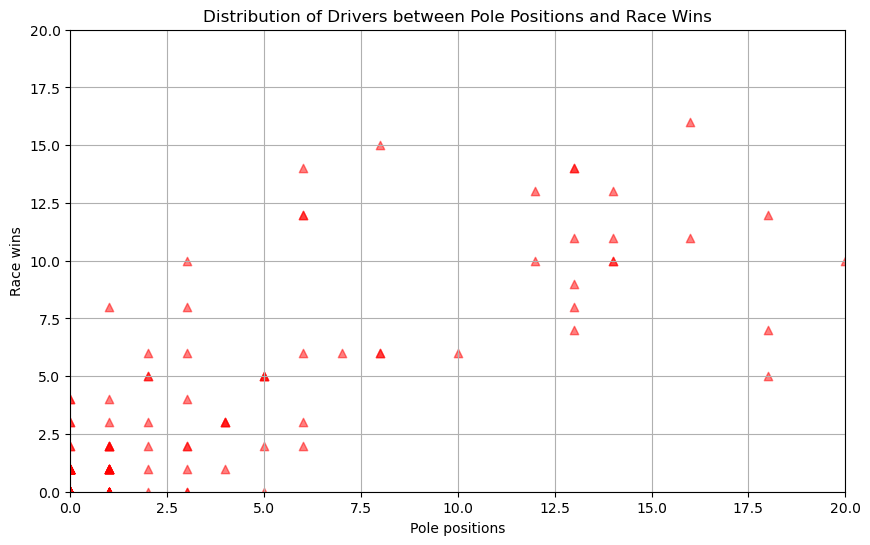

In [97]:
drive_pole = df[["Pole_Positions", "Race_Wins"]]


plt.figure(figsize=(10, 6))
plt.scatter(drive_pole ["Pole_Positions"], drive_pole ["Race_Wins"], alpha=0.5, color="red", marker="^")
plt.title("Distribution of Drivers between Pole Positions and Race Wins")
plt.xlabel("Pole positions")
plt.ylabel("Race wins")
plt.grid(True)

plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

Drivers in the upper right corner: Drivers who have many pole positions and many wins. This suggests that they are both fast in qualifying and race winners.

Drivers in the lower right corner: Drivers who have few pole positions but many wins. This suggests that they may not start from pole position often, but still win many races.

Drivers in the upper left corner: Drivers with many pole positions but few wins. This may indicate that they excel in qualifying but have less success in races.

Drivers in the lower left corner: Drivers with few pole positions and few wins. This suggests they have less success in both qualifying and races.

### 5. Simple regression analysis of data on the correlation between pole position and wins.

In [105]:
import statsmodels.api as sm

# Select independent and dependent variables
X = df['Pole_Positions']
y = df['Race_Wins']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Obtain the regression results
results = model.summary()

print(results)

                            OLS Regression Results                            
Dep. Variable:              Race_Wins   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     8967.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:45:04   Log-Likelihood:                -1800.3
No. Observations:                 868   AIC:                             3605.
Df Residuals:                     866   BIC:                             3614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0325      0.067      0.

Based on the results of the regression analysis, we can draw some practical conclusions in straightforward terms:

Influence of Pole Position: Starting in the first position in a race (pole position) is highly advantageous. The analysis suggests that nearly 91.2% of race wins can be explained by the fact of starting from the pole position.

Significant Advantage: Each time a driver starts from the pole position, the analysis predicts, on average, an increase of approximately 0.9767 race wins. This represents a significant advantage.

Strong Statistical Evidence: The numbers show that the relationship between pole position and race wins is statistically robust, with a very low p-value. This means that this relationship is not a result of chance.

Well-Fitted Model: The regression model as a whole is highly significant, indicating its effectiveness in explaining the variation in race wins.

In summary, the practical results highlight that starting from the pole position is a significant asset for drivers in their quest for race wins in Formula 1. Each time a driver secures the pole position, their chances of winning increase substantially. Therefore, the starting position is a critical factor in a driver's performance.

### 6. Plotting a regression graph to visually analyze the slope of the line.

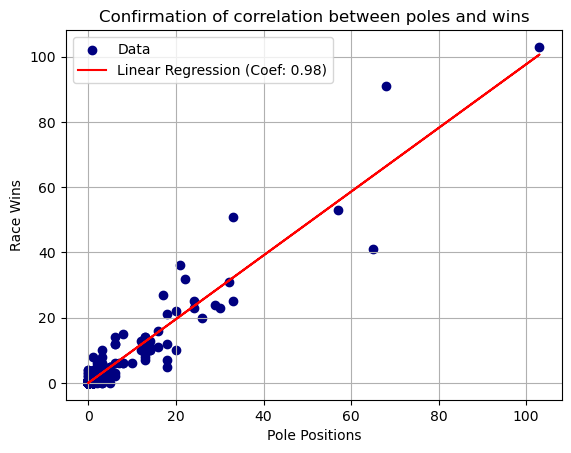

In [106]:
# Extracting regression coefficients
coef = model.params['Pole_Positions']
const = model.params['const']

# Plotting the actual data and the regression line
plt.scatter(df['Pole_Positions'], df['Race_Wins'], label='Data', alpha=1, color="navy")
plt.plot(df['Pole_Positions'], df['Pole_Positions'] * coef + const, color='red', alpha=1, label=f'Linear Regression (Coef: {coef:.2f})')
plt.xlabel('Pole Positions')
plt.ylabel('Race Wins')
plt.title("Confirmation of correlation between poles and wins")
plt.legend()
plt.grid(True)
plt.show()

Here we can confirm what was seen earlier, we have a strong correlation with a COEF of 0.98. In other words, the relationship between starting from a pole position and achieving high placements (and winning) is very significant. This can make it extremely challenging for less prominent drivers to attain high positions and victories.

#### Ideas for Future Work: Analyze the data interactively, using a dashboard platform to visualize driver statistics.